# Enunciado práctica Python

## Propósito
El objetivo de esta práctica es demostrar el conocimiento adquirido en las sesiones de Python.

La práctica consiste en el uso de Python puro y pandas, por lo tanto los conocimientos necesarios para realizar esta práctica no incluyen:
 * Uso de SqlAlchemy para subir o descargar datos desde la base de datos
 * Uso de Selenium para obtener datos de páginas web.
 
## Datos
Los datos utilizados en esta práctica están en la carpeta Dataset.

En ella encontraréis cinco ficheros diferentes:
 1. ```fact_venta.csv``` Datos de venta de una empresa ficticia
 2. ```productos.csv``` Maestro de productos
 3. ```clientes.csv``` Maestro de clientes
 4. ```conversion.csv``` Datos de asistencia a centros y conversión
 5. ```poblacion.csv``` Datos de población por municipio
 
Para cada fichero deberéis determinar (utilizando Python), qué parámetros debéis utilizar para abrir correctamente los ficheros.
 
Para ayudaros deteminar estos parámetros, os facilitamos la siguiente función: 


In [1]:
import os
ruta_datos = 'Dataset/'

def check_inicio(fichero):
    ruta = fichero
    if not ruta.startswith(ruta_datos):
        ruta = os.path.join(ruta_datos, ruta)
    
    if not os.path.exists(ruta):
        print('No existe un fichero con ese nombre')
        return
    
    with open(ruta) as f:
        print(f.readline())
        print(f.readline())
    

## Formato y Fecha de Entrega

El trabajo debe entregarse en formato notebook de Python antes del **31 de Diciembre a las 23:59**.

Tratad de ser concisos en las respuestas y **documentad todo el código** (indicad el propósito de lo que estáis haciendo).


# Ejercicio 1. Lectura y escritura de ficheros

## Apartado 1
Añade un docstring a ```check_inicio``` para saber qué hace (recomendamos que le paséis algunos parámetros de entrada para entender bien cómo funciona)

Intentad dejar documentado el uso del atributo ruta_datos.

## Apartado 2
Determinar los parámetros que debemos pasar a pandas para que nos lea los datos (atención especial al parámetro ```decimal```).

## Apartado 3
Cread una función que reciba como único parámetro el nombre del fichero y devuelva un dataframe con el fichero correctamente cargado.

## Apartado 4
Unid todos los dataframes en uno y guardarlo con el nombre ```6. combinado.csv``` utilizando la misma configuración (no la misma función) que habéis utilizado para la lectura.


In [2]:
# Apartado 1

check_inicio('./Dataset/')
check_inicio('1. fact_venta.csv')

No existe un fichero con ese nombre
TIENDA_ID;PRODUCTO_ID;DIA_ID;CLIENTE_ID;PVP;MARGEN_COMERCIAL;DESCUENTO;MARGEN_REAL;MARGEN_TEORICO;DESCUENTO_EUROS;MES_ID;KEY_CONVERSION

Tienda 1;Producto 02-15;2019-01-01;Cliente 5443;118,31155603077853;0,15285788810293935;0,06680936347692751;10,180534842656225;18,084854593037385;-7,904319750381158;201901;Tienda 1_20190101



In [3]:
# Apartado 2 - leer todos los csv
import pandas as pd

dataframes_list = []
for i in range(len(os.listdir(ruta_datos))):
    if '.csv' in os.listdir(ruta_datos)[i]:
        print(os.listdir(ruta_datos)[i])
        temp_df = pd.read_csv(ruta_datos+os.listdir(ruta_datos)[i],sep=';',decimal=',')
        dataframes_list.append(temp_df)
    
fact_venta = dataframes_list[0]
productos = dataframes_list[1]
clientes = dataframes_list[2]
conversion = dataframes_list[3]
poblacion = dataframes_list[4]

for i in dataframes_list:
    print(i.dtypes)
    print('\n')

1. fact_venta.csv
2. productos.csv
3. clientes.csv
4. conversion.csv
5. poblacion.csv
6. combinado.csv
7. combinado_limpio.csv
TIENDA_ID            object
PRODUCTO_ID          object
DIA_ID               object
CLIENTE_ID           object
PVP                 float64
MARGEN_COMERCIAL    float64
DESCUENTO           float64
MARGEN_REAL         float64
MARGEN_TEORICO      float64
DESCUENTO_EUROS     float64
MES_ID                int64
KEY_CONVERSION       object
dtype: object


FAMILIA_ID           object
PRODUCTO_ID          object
PVP                 float64
MARGEN_COMERCIAL    float64
dtype: object


CLIENTE_ID       object
EDAD              int64
SEXO             object
PROVINCIA_ID      int64
RANGO_EDAD       object
KEY_POBLACION    object
dtype: object


TIENDA_ID         object
DIA_ID            object
VISITAS            int64
VENTAS             int64
KEY_CONVERSION    object
dtype: object


FY_ID             int64
PROVINCIA_ID      int64
RANGO_EDAD       object
SEXO             obj

In [4]:
# Apartado 3

def open_csv(nombre):
    data = pd.read_csv(ruta_datos+"{}".format(nombre),sep=';',decimal=',')
    return data


dataframes_list = []
for i in os.listdir(ruta_datos):
    if '.csv' in i:
        k = open_csv(i)
        dataframes_list.append(k)

dataframes_list

[        TIENDA_ID     PRODUCTO_ID      DIA_ID     CLIENTE_ID         PVP  \
 0        Tienda 1  Producto 02-15  2019-01-01   Cliente 5443  118.311556   
 1        Tienda 1  Producto 01-09  2019-01-01  Cliente 12034  145.312939   
 2        Tienda 1  Producto 01-10  2019-01-01  Cliente 16282  149.268808   
 3        Tienda 1  Producto 02-11  2019-01-01  Cliente 21213  101.745596   
 4        Tienda 1  Producto 00-20  2019-01-01  Cliente 22562  489.426407   
 ...           ...             ...         ...            ...         ...   
 280071  Tienda 10  Producto 01-11  2019-12-31  Cliente 19209  156.188588   
 280072  Tienda 10  Producto 01-11  2019-12-31   Cliente 8679  156.188588   
 280073  Tienda 10  Producto 00-21  2019-12-31  Cliente 21707  497.741337   
 280074  Tienda 10  Producto 00-13  2019-12-31  Cliente 24037  411.715709   
 280075  Tienda 10  Producto 02-08  2019-12-31   Cliente 7572   90.173403   
 
         MARGEN_COMERCIAL  DESCUENTO  MARGEN_REAL  MARGEN_TEORICO  \
 0   

In [5]:
dataframes_list = []
for i in os.listdir(ruta_datos):
    if '.csv' in i:
        k = open_csv(i)
        dataframes_list.append(k)
for i in dataframes_list:
    print(i.columns)

Index(['TIENDA_ID', 'PRODUCTO_ID', 'DIA_ID', 'CLIENTE_ID', 'PVP',
       'MARGEN_COMERCIAL', 'DESCUENTO', 'MARGEN_REAL', 'MARGEN_TEORICO',
       'DESCUENTO_EUROS', 'MES_ID', 'KEY_CONVERSION'],
      dtype='object')
Index(['FAMILIA_ID', 'PRODUCTO_ID', 'PVP', 'MARGEN_COMERCIAL'], dtype='object')
Index(['CLIENTE_ID', 'EDAD', 'SEXO', 'PROVINCIA_ID', 'RANGO_EDAD',
       'KEY_POBLACION'],
      dtype='object')
Index(['TIENDA_ID', 'DIA_ID', 'VISITAS', 'VENTAS', 'KEY_CONVERSION'], dtype='object')
Index(['FY_ID', 'PROVINCIA_ID', 'RANGO_EDAD', 'SEXO', 'POBLACION',
       'KEY_POBLACION'],
      dtype='object')
Index([',TIENDA_ID,PRODUCTO_ID,DIA_ID,CLIENTE_ID,PVP,MARGEN_COMERCIAL,DESCUENTO,MARGEN_REAL,MARGEN_TEORICO,DESCUENTO_EUROS,MES_ID,KEY_CONVERSION,VISITAS,VENTAS,FAMILIA_ID,EDAD,SEXO,PROVINCIA_ID,RANGO_EDAD,KEY_POBLACION,FY_ID,POBLACION'], dtype='object')
Index([',TIENDA_ID,PRODUCTO_ID,DIA_ID,CLIENTE_ID,PVP,MARGEN_COMERCIAL,DESCUENTO,MARGEN_REAL,MARGEN_TEORICO,DESCUENTO_EUROS,MES_ID,KEY_CO

In [6]:
# Apartado 4

df = pd.merge(dataframes_list[0],dataframes_list[3],how='left',on='KEY_CONVERSION',suffixes = (None,'_y'))
df = pd.merge(df,dataframes_list[1],how='left',on='PRODUCTO_ID',suffixes = (None,'_y'))
cl = pd.merge(dataframes_list[2],dataframes_list[4],how='left',on='KEY_POBLACION',suffixes = (None,'_y'))
df = pd.merge(df,cl,how='left',on='CLIENTE_ID',suffixes = (None,'_y'))

for i in df.columns:
    if '_y' in i:
        df.drop(i,axis=1,inplace=True)
        
df.to_csv(ruta_datos+'6. combinado.csv')

In [7]:
df.dtypes

TIENDA_ID            object
PRODUCTO_ID          object
DIA_ID               object
CLIENTE_ID           object
PVP                 float64
MARGEN_COMERCIAL    float64
DESCUENTO           float64
MARGEN_REAL         float64
MARGEN_TEORICO      float64
DESCUENTO_EUROS     float64
MES_ID                int64
KEY_CONVERSION       object
VISITAS               int64
VENTAS                int64
FAMILIA_ID           object
EDAD                  int64
SEXO                 object
PROVINCIA_ID          int64
RANGO_EDAD           object
KEY_POBLACION        object
FY_ID                 int64
POBLACION             int64
dtype: object

# Ejercicio 2. Entendimiento del Dataset

## Apartado 1. Tipos de datos 
Utiliza ```dtypes``` sobre el dataset combinado.

¿Los tipos de datos se corresponden con los esperados?

¿Puedes convertir el tipo de datos al adecuado si no se ha interpretado correctamente?

## Apartado 2. Descriptiva

Obtén estadísticas descriptivas del Dataset combinado. 

¿Qué métodos puedes emplear?

## Apartado 3. Renombrado de columnas
¿Tienen sentido todas las columnas? Cuáles deberíamos renombrar o eliminar.

## Apartado 4. Selección de datos relevantes
Para poder seguir trabajando vamos a intentar quedarnos únicamente con los datos más relevantes del dataset.

Obtén los puntos de corte entre el cuartil 1 y 2 y entre el 3 y el 4 para la columna ```MARGEN_REAL```. Filtra el Dataset para quedarnos únicamente con las filas que estén entre esos dos valores.

(Si no sois capaces de determinar esos puntos utilizando funciones de Pandas utilizad -2 y 50 como puntos de corte sobre esa columna).

Guardad el DataSet que nos queda si filtramos con esas condiciones con el nombre ```7. combinado_limpio.csv```



In [8]:
# Apartado 1

df.dtypes

TIENDA_ID            object
PRODUCTO_ID          object
DIA_ID               object
CLIENTE_ID           object
PVP                 float64
MARGEN_COMERCIAL    float64
DESCUENTO           float64
MARGEN_REAL         float64
MARGEN_TEORICO      float64
DESCUENTO_EUROS     float64
MES_ID                int64
KEY_CONVERSION       object
VISITAS               int64
VENTAS                int64
FAMILIA_ID           object
EDAD                  int64
SEXO                 object
PROVINCIA_ID          int64
RANGO_EDAD           object
KEY_POBLACION        object
FY_ID                 int64
POBLACION             int64
dtype: object

In [9]:
df['DIA_ID'] = pd.to_datetime(df['DIA_ID'])
df.dtypes

TIENDA_ID                   object
PRODUCTO_ID                 object
DIA_ID              datetime64[ns]
CLIENTE_ID                  object
PVP                        float64
MARGEN_COMERCIAL           float64
DESCUENTO                  float64
MARGEN_REAL                float64
MARGEN_TEORICO             float64
DESCUENTO_EUROS            float64
MES_ID                       int64
KEY_CONVERSION              object
VISITAS                      int64
VENTAS                       int64
FAMILIA_ID                  object
EDAD                         int64
SEXO                        object
PROVINCIA_ID                 int64
RANGO_EDAD                  object
KEY_POBLACION               object
FY_ID                        int64
POBLACION                    int64
dtype: object

In [10]:
# Apartado 3

df.describe()

,PVP,MARGEN_COMERCIAL,DESCUENTO,MARGEN_REAL,MARGEN_TEORICO,DESCUENTO_EUROS,MES_ID,VISITAS,VENTAS,EDAD,PROVINCIA_ID,FY_ID,POBLACION
count,280076.000000,280076.000000,280076.000000,280076.000000,280076.000000,280076.000000,280076.000000,280076.000000,280076.000000,280076.000000,280076.000000,280076.0,280076.000000
mean,271.759699,0.161283,0.083577,36.355344,59.064943,-22.709599,201906.566896,329.909421,112.562676,37.135460,27.251496,2019.0,27559.343828
std,244.374839,0.117963,0.042608,75.429590,89.863021,25.654504,3.456496,253.212165,60.814766,11.496164,9.397017,0.0,12033.283071
min,2.026233,0.003249,0.000152,-138.995390,0.263382,-214.681797,201901.000000,4.000000,2.000000,18.000000,15.000000,2019.0,5256.000000
25%,95.057291,0.060713,0.050170,-1.917773,7.460540,-30.602021,201904.000000,131.000000,63.000000,28.000000,15.000000,2019.0,20574.000000
50%,145.312939,0.137656,0.077764,5.927129,17.413742,-12.751122,201907.000000,268.000000,103.000000,35.000000,32.000000,2019.0,26140.000000
75%,431.889725,0.252678,0.113769,49.642932,75.830991,-5.837937,201910.000000,464.000000,152.000000,45.000000,36.000000,2019.0,38847.000000
max,1079.518612,0.499252,0.199939,537.281028,538.952071,-0.002576,201912.000000,1754.000000,300.000000,69.000000,36.000000,2019.0,48147.000000


In [11]:
# Apartado 4

df = df[df['MARGEN_REAL'].isna()==False]
df.MARGEN_REAL.isna().unique()

array([False])

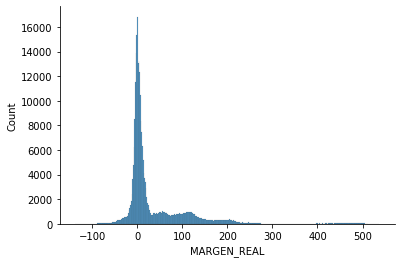

In [12]:
import seaborn as sns

sns.histplot(df['MARGEN_REAL'])
sns.despine()

In [13]:
q1 = df['MARGEN_REAL'].quantile(0.25)
q3 = df['MARGEN_REAL'].quantile(0.75)

df = df[(df['MARGEN_REAL']>=q1) & (df['MARGEN_REAL']<=q3)]
df.describe()

,PVP,MARGEN_COMERCIAL,DESCUENTO,MARGEN_REAL,MARGEN_TEORICO,DESCUENTO_EUROS,MES_ID,VISITAS,VENTAS,EDAD,PROVINCIA_ID,FY_ID,POBLACION
count,140038.000000,140038.000000,140038.000000,140038.000000,140038.000000,140038.000000,140038.000000,140038.000000,140038.00000,140038.000000,140038.000000,140038.0,140038.000000
mean,159.117720,0.140046,0.072124,9.498527,21.510077,-12.011550,201906.573330,330.136977,112.45177,37.160913,27.218391,2019.0,27589.721904
std,145.938099,0.071420,0.038870,11.219372,22.727417,15.198963,3.458573,253.286910,60.79219,11.495769,9.404622,0.0,12034.425262
min,2.026233,0.003249,0.000152,-1.917748,0.263382,-180.923713,201901.000000,4.000000,2.00000,18.000000,15.000000,2019.0,5256.000000
25%,75.768124,0.080322,0.043212,1.601951,8.424498,-13.562029,201904.000000,131.000000,63.00000,28.000000,15.000000,2019.0,20574.000000
50%,116.469457,0.128873,0.064845,5.927129,14.162339,-7.004187,201907.000000,268.000000,103.00000,35.000000,32.000000,2019.0,26140.000000
75%,173.161855,0.192000,0.096259,13.146824,22.858533,-3.662947,201910.000000,465.000000,152.00000,45.000000,36.000000,2019.0,38847.000000
max,976.935853,0.338350,0.199537,49.642789,194.338473,-0.002576,201912.000000,1754.000000,300.00000,69.000000,36.000000,2019.0,48147.000000


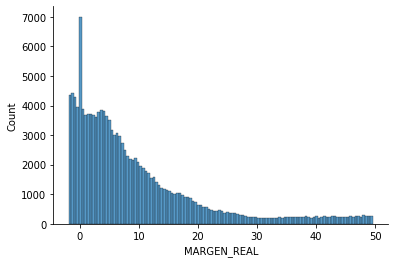

In [14]:
sns.histplot(df['MARGEN_REAL'])
sns.despine()

In [15]:
df.to_csv(ruta_datos+'7. combinado_limpio.csv')

# Ejercicio 3. Agregación y visualización de datos

## Dimensión temporal.
Mostrad, a nivel día, la evolución de las ventas de la compañía y el margen real obtenido.

## Dimensión Tienda
Mostrad, a nivel tienda-día, la evolución de las ventas de la compañía, las visitas y el número de tickets.

## Dimensión Tienda 2
Mostrad, en un grafo de barras acumulado, la distribución entre número de ventas y visitas de cada tienda.

In [16]:
df.columns

Index(['TIENDA_ID', 'PRODUCTO_ID', 'DIA_ID', 'CLIENTE_ID', 'PVP',
       'MARGEN_COMERCIAL', 'DESCUENTO', 'MARGEN_REAL', 'MARGEN_TEORICO',
       'DESCUENTO_EUROS', 'MES_ID', 'KEY_CONVERSION', 'VISITAS', 'VENTAS',
       'FAMILIA_ID', 'EDAD', 'SEXO', 'PROVINCIA_ID', 'RANGO_EDAD',
       'KEY_POBLACION', 'FY_ID', 'POBLACION'],
      dtype='object')

In [17]:
df['DIA_ID'].unique()

array(['2019-01-01T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-01-04T00:00:00.000000000',
       '2019-01-05T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-11T00:00:00.000000000', '2019-01-12T00:00:00.000000000',
       '2019-01-13T00:00:00.000000000', '2019-01-14T00:00:00.000000000',
       '2019-01-15T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2019-01-17T00:00:00.000000000', '2019-01-18T00:00:00.000000000',
       '2019-01-19T00:00:00.000000000', '2019-01-20T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-01-22T00:00:00.000000000',
       '2019-01-23T00:00:00.000000000', '2019-01-24T00:00:00.000000000',
       '2019-01-25T00:00:00.000000000', '2019-01-26T00:00:00.000000000',
       '2019-01-27T00:00:00.000000000', '2019-01-28

**Dimension Tiempo**

In [18]:
gr1 = df.groupby(by='DIA_ID',as_index=False).agg({'VENTAS': ['sum'], 
                                                       'MARGEN_REAL': ['mean']}
                                                )
gr1.columns = gr1.columns.get_level_values(0)
gr1

,DIA_ID,VENTAS,MARGEN_REAL
0,2019-01-01,27625,8.903436
1,2019-01-02,62499,8.879315
2,2019-01-03,60209,9.671136
3,2019-01-04,26142,9.849236
4,2019-01-05,38078,9.122288
...,...,...,...
360,2019-12-27,35135,9.406195
361,2019-12-28,24615,9.439437
362,2019-12-29,67990,10.125820
363,2019-12-30,54778,9.789966


In [19]:
gr1['Month'] = gr1['DIA_ID'].dt.strftime('%m').astype(int)

In [20]:
gr1_b = gr1.groupby(by='Month',as_index=False).agg({'VENTAS': ['sum'], 
                                                       'MARGEN_REAL': ['mean']}
                                                )
gr1_b.columns = gr1_b.columns.get_level_values(0)

In [21]:
gr1_b['VENTAS_ACUM'] = gr1_b['VENTAS'].cumsum()
gr1_b

,Month,VENTAS,MARGEN_REAL,VENTAS_ACUM
0,1,1395785,9.452310,1395785
1,2,1051520,9.642265,2447305
2,3,1334162,9.430887,3781467
3,4,1293805,9.639883,5075272
4,5,1314418,9.475782,6389690
5,6,1173850,9.689830,7563540
6,7,1388697,9.352412,8952237
7,8,1255732,9.536636,10207969
8,9,1426538,9.350020,11634507
9,10,1386228,9.592891,13020735


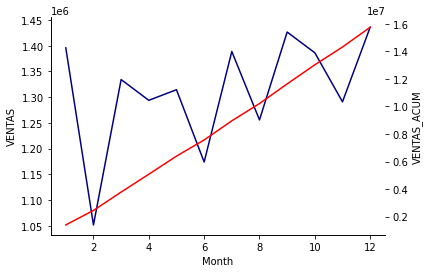

In [22]:
import matplotlib.pyplot as plt

sns.lineplot(data=gr1_b, x="Month", y="VENTAS",color='navy')
ax2 = plt.twinx()
sns.lineplot(data=gr1_b, x="Month", y="VENTAS_ACUM",color='r',ax=ax2)
sns.despine()

**Dimension Tienda**

In [23]:
df.columns

Index(['TIENDA_ID', 'PRODUCTO_ID', 'DIA_ID', 'CLIENTE_ID', 'PVP',
       'MARGEN_COMERCIAL', 'DESCUENTO', 'MARGEN_REAL', 'MARGEN_TEORICO',
       'DESCUENTO_EUROS', 'MES_ID', 'KEY_CONVERSION', 'VISITAS', 'VENTAS',
       'FAMILIA_ID', 'EDAD', 'SEXO', 'PROVINCIA_ID', 'RANGO_EDAD',
       'KEY_POBLACION', 'FY_ID', 'POBLACION'],
      dtype='object')

In [24]:
df['KEY_CONVERSION'].unique()

array(['Tienda 1_20190101', 'Tienda 1_20190102', 'Tienda 1_20190103', ...,
       'Tienda 10_20191229', 'Tienda 10_20191230', 'Tienda 10_20191231'],
      dtype=object)

In [25]:
gr2 = df.groupby(by='KEY_CONVERSION').agg({'VENTAS': ['mean'], 
                                                       'VISITAS': ['mean'],
                                                        'KEY_CONVERSION': ['count']}
                                                )
gr2.columns = gr2.columns.get_level_values(0)
gr2.columns = ['VENTAS','VISITAS','NUM_TICKETS']
gr2 = gr2.reset_index()

In [26]:
gr2

,KEY_CONVERSION,VENTAS,VISITAS,NUM_TICKETS
0,Tienda 10_20190101,64,143,36
1,Tienda 10_20190102,17,70,12
2,Tienda 10_20190103,59,272,29
3,Tienda 10_20190104,81,370,45
4,Tienda 10_20190105,27,62,11
...,...,...,...,...
3644,Tienda 9_20191227,24,55,11
3645,Tienda 9_20191228,87,200,44
3646,Tienda 9_20191229,78,183,42
3647,Tienda 9_20191230,129,157,60


In [27]:
gr3 = df.drop_duplicates('KEY_CONVERSION')
gr3 = gr3.groupby(by='TIENDA_ID',as_index=False).agg({'VENTAS': ['sum'], 
                                                       'VISITAS': ['sum']})
gr3.columns = gr3.columns.get_level_values(0)

In [28]:
gr3['Ratio'] = round(gr3.VENTAS / gr3.VISITAS, 2)
gr3 = gr3.sort_values(by='VENTAS',ascending=False)
gr3

,TIENDA_ID,VENTAS,VISITAS,Ratio
0,Tienda 1,41143,133777,0.31
2,Tienda 2,39160,119746,0.33
8,Tienda 8,36333,96854,0.38
6,Tienda 6,31762,53801,0.59
4,Tienda 4,30804,136300,0.23
9,Tienda 9,26052,61977,0.42
3,Tienda 3,21924,28973,0.76
7,Tienda 7,21535,107251,0.20
1,Tienda 10,17227,47088,0.37
5,Tienda 5,14132,18249,0.77


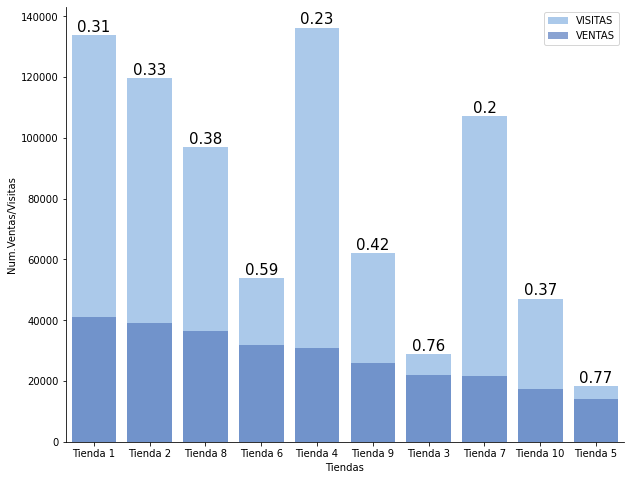

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
labels = list(gr3.index.unique())

sns.set_color_codes("pastel")

sns.barplot(x="TIENDA_ID", y="VISITAS", data=gr3,
            label="VISITAS", color="b")

sns.set_color_codes("muted")
sns.barplot(x="TIENDA_ID", y="VENTAS", data=gr3,
            label="VENTAS", color="b",alpha=0.7)

for bar,i in zip(ax.patches,range(gr3.shape[0])):
    plt.annotate(round(gr3.reset_index().loc[i,'Ratio'],2),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylabel('Num.Ventas/Visitas')
plt.xlabel('Tiendas')
ax.legend()
sns.despine()
plt.show()

In [30]:
gr3.corr().style.background_gradient(cmap='plasma')

,VENTAS,VISITAS,Ratio
VENTAS,1.000000,0.745987,-0.447670
VISITAS,0.745987,1.000000,-0.857902
Ratio,-0.447670,-0.857902,1.000000


**¿Cuál es la tienda que más se parece a la Tienda 1?**

In [31]:
gr3 = gr3.set_index('TIENDA_ID')
gr3_corr = gr3.corrwith(gr3[gr3.index.str.endswith('1')].iloc[0], axis=1).sort_values(ascending=False).to_frame()
gr3_corr.drop('Tienda 1',axis=0,inplace=True)

In [32]:
gr3_corr

,0
TIENDA_ID,
Tienda 2,0.999768
Tienda 10,0.997889
Tienda 8,0.997153
Tienda 4,0.996152
Tienda 7,0.993510
Tienda 9,0.991952
Tienda 6,0.948405
Tienda 3,0.874287
Tienda 5,0.865072


In [33]:
gr3_corr = gr3.corrwith(gr3[gr3.index.str.endswith('5')].iloc[0], axis=1).sort_values(ascending=False).to_frame()
gr3_corr.drop('Tienda 5',axis=0,inplace=True)
gr3_corr

,0
TIENDA_ID,
Tienda 3,0.999826
Tienda 6,0.979492
Tienda 9,0.921625
Tienda 8,0.900433
Tienda 10,0.895821
Tienda 2,0.875671
Tienda 1,0.865072
Tienda 4,0.817779
Tienda 7,0.802400
